Mean Squared Error (MSE) after Bussgang Algorithm: 6.347469093576136


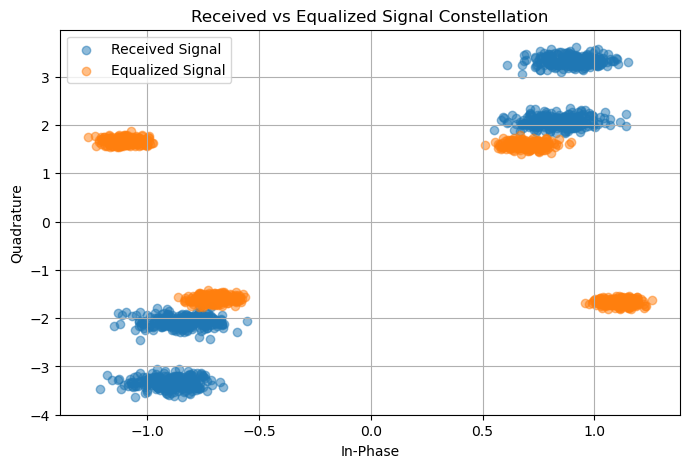

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def bussgang_algorithm(received_signal, num_tx, num_iterations=1000, step_size=0.001, clip_threshold=1.0):
    """
    Perform blind channel equalization using the Bussgang Algorithm.
    
    Parameters:
    received_signal (ndarray): The received signal matrix (num_rx x num_samples).
    num_tx (int): Number of transmitting antennas.
    num_iterations (int): Number of iterations for adaptation.
    step_size (float): Learning rate for the update rule.
    clip_threshold (float): Threshold for clipping the error term to prevent overflow.
    
    Returns:
    equalized_signal (ndarray): The signal after applying the Bussgang algorithm.
    weights (ndarray): The adaptive weights learned by the Bussgang algorithm.
    """
    num_rx, num_samples = received_signal.shape
    
    # Initialize weights randomly
    weights = np.random.randn(num_tx, num_rx) + 1j * np.random.randn(num_tx, num_rx)
    
    # Initialize equalized signal
    equalized_signal = np.zeros((num_tx, num_samples), dtype=np.complex_)
    
    for _ in range(num_iterations):
        # Apply weights to received signal
        equalized_signal = weights @ received_signal
        
        # Compute error based on constant modulus criterion
        error = (np.abs(equalized_signal) ** 2 - 1) * equalized_signal
        
        # Clip extreme values to avoid overflow
        error = np.clip(error, -clip_threshold, clip_threshold)
        
        # Update weights using gradient descent
        weights += step_size * (error @ received_signal.conj().T)
        
        # Normalize weights periodically to control their magnitude
        weights = weights / np.linalg.norm(weights)
    
    return equalized_signal, weights

# Example Usage
if __name__ == "__main__":
    np.random.seed(42)
    num_tx = 2  # Number of transmitting antennas
    num_rx = 3  # Number of receiving antennas
    num_samples = 1000  # Number of received samples
    
    # Generate a random transmitted signal X
    X = np.sign(np.random.randn(num_tx, num_samples) + 1j * np.random.randn(num_tx, num_samples))  # QPSK-like signal
    
    # Generate a random channel matrix H (ground truth)
    H_true = np.random.randn(num_rx, num_tx) + 1j * np.random.randn(num_rx, num_tx)
    
    # Simulate received signal Y = H * X + Noise
    noise = 0.1 * (np.random.randn(num_rx, num_samples) + 1j * np.random.randn(num_rx, num_samples))
    received_signal = H_true @ X + noise
    
    # Perform Bussgang-based blind equalization
    equalized_signal, weights = bussgang_algorithm(received_signal, num_tx)
    
    # Compute Mean Squared Error (MSE) between transmitted and equalized signal
    mse = np.mean(np.abs(X - equalized_signal) ** 2)
    
    print("Mean Squared Error (MSE) after Bussgang Algorithm:", mse)
    
    # Plot received vs equalized signal constellation
    plt.figure(figsize=(8, 5))
    plt.scatter(received_signal[0, :].real, received_signal[0, :].imag, alpha=0.5, label='Received Signal')
    plt.scatter(equalized_signal[0, :].real, equalized_signal[0, :].imag, alpha=0.5, label='Equalized Signal')
    plt.xlabel("In-Phase")
    plt.ylabel("Quadrature")
    plt.title("Received vs Equalized Signal Constellation")
    plt.legend()
    plt.grid()
    plt.show()
